In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

import pandas as pd
import numpy as np
from sklearn.cluster import KMeans


In [2]:
X = np.array([[1,2], [1.5, 1.8], [5,8], [8,8], [1, 0.6], [9,11]])
#plt.scatter(X[:,0], X[:,1], s=150)
#plt.show()

clf = KMeans(n_clusters=2)
clf.fit(X)

# output some paramaters from KMeans
centroids = clf.cluster_centers_
labels = clf.labels_
print(centroids)
print(labels)

colors = 10*["g", 'r', 'c', 'b', 'k']
for i in range(len(X)):
    #plt.plot(X[i][0], X[i][1], colors[labels[i]],  markersize=25)
    pass
#plt.scatter(centroids[:, 0], centroids[0:, 1], marker='*', s=100)
#plt.show()


[[ 1.16666667  1.46666667]
 [ 7.33333333  9.        ]]
[0 0 1 1 0 1]


In [2]:
# here we are going to define a function that will convert the categoroy values to numeric values
#def handle_non_numeric_data(df):
#    columns = df.columns.values
    
#    for column in columns:
#        text_digit_vals = {}
#        def convert_to_int(val):
#            return text_digit_vals[val]
        
#        if df[column].dtype != np.int64 and df[column].dtype != np.float64:
#            column_contents = df[column].values.tolist()
#            unique_elem = set(column_contents)
            
#            idx = 0
#            for unique in unique_elem:
#                if unique not in text_digit_vals:
#                    text_digit_vals[unique] = idx
#                    idx += 1
                    
#            df[column] = list(map(convert_to_int, df[column]))
            
#    return df

In [3]:
from sklearn import preprocessing

# use titanic dataset for this exercise
df = pd.read_excel('titanic.xls')
df.drop(['body', 'name'], 1, inplace=True)
df.convert_objects(convert_numeric=True)
df.fillna(0, inplace=True)

'''
# convert text to numeric as factors using pandas package
df['sex'] = pd.factorize(df['sex'])[0]
df.ticket = pd.factorize(df.ticket)[0]
df.cabin = pd.factorize(df.cabin)[0]
df.embarked = pd.factorize(df.embarked)[0]
df.boat = pd.factorize(df.boat)[0]
df['home.dest'] = pd.factorize(df['home.dest'])[0]
'''
# here I used the one I defined myself to do the conversion
import ML_module
ML_module.handle_non_numeric_data(df)
print(df.head())

df.drop(['home.dest'], 1, inplace=True)

X = np.array(df.drop(['survived'], 1).astype(float))
X = preprocessing.scale(X)
y = np.array(df['survived'])

clf = KMeans(n_clusters=2)
clf.fit(X)

correct = 0
for i in range(len(X)):
    #print("X[i] value is: ",  X[i])
    predict_me = np.array(X[i].astype(float))
    #print(predict_me)
    predict_me = predict_me.reshape(-1, len(X[i]))
    #print(predict_me)
    prediction = clf.predict(predict_me)
    #print(prediction)
    #break
    if prediction[0] == y[i]:
        correct+=1
print(correct/len(X))

C:\Users\ting\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


   pclass  survived  sex  age  sibsp  parch  ticket  fare  cabin  embarked  \
0       0         1    1   30      0      0     751   176    183         3   
1       0         1    0   92      1      2     492   133     96         3   
2       0         0    1    2      1      2     492   133     96         3   
3       0         0    0   31      1      2     492   133     96         3   
4       0         0    1   25      1      2     492   133     96         3   

   boat  home.dest  
0     1         10  
1    16        303  
2     0        303  
3     0        303  
4     0        303  
0.35141329258976317


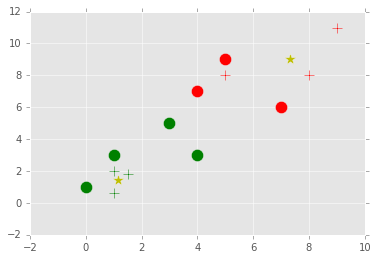

In [4]:
# Here I am going to define K-Means algorithm myself here
class K_Means():
    def __init__(self, k=2, tol=0.001, max_iter=300):
        self.k = k
        self.tol = tol
        self.max_iter = max_iter
        
    # for training
    def fit(self, data):
        self.centroids = {}
        
        for i in range(self.k):
            self.centroids[i] = data[i]
            
        for i in range(self.max_iter):
            self.classifications = {}    # this is a hash where the key is the centroid and values are feature list
            
            for j in range(self.k):
                self.classifications[j] = []   # this only contains the feature list
                
            for featureset in data:
                distances = [np.linalg.norm(featureset - self.centroids[centroid]) for centroid in self.centroids]
                classification = distances.index(min(distances))
                self.classifications[classification].append(featureset)
                
            prev_centroids = dict(self.centroids)
            
            for classification in self.classifications:
                self.centroids[classification] = np.average(self.classifications[classification], axis=0)
                
            optimized = True
            for c in self.centroids:
                if np.sum((self.centroids[c]-prev_centroids[c])/prev_centroids[c] * 100.0) > self.tol:
                    optimized = False
                    
            if optimized:
                break
    
    # for prediction
    def predict(self, data):
        distances = [np.linalg.norm(data - self.centroids[c]) for c in self.centroids]
        classification = distances.index(min(distances))
        return classification

X = np.array([[1,2], [1.5, 1.8], [5,8], [8,8], [1, 0.6], [9,11]])

# run K_means
clf = K_Means()
clf.fit(X)

# plot centroids
for c in clf.centroids:
    plt.scatter(clf.centroids[c][0], clf.centroids[c][1], marker="*", s=150, c='y')
    
# plot the original feature sets after the classification information added
for c in clf.classifications:
    color = colors[c]
    for featureset in clf.classifications[c]:
        plt.scatter(featureset[0], featureset[1], marker="+", c=color, s=100)
    
# predicting unknown
unknowns = np.array([[0,1], [1,3], [3,5], [4,3], [7,6], [5,9],[4,7]])
for unknown in unknowns:
    classification = clf.predict(unknown)
    plt.scatter(unknown[0], unknown[1], c=colors[classification], s=150, marker='o')

In [6]:
# now use the titanic dataset for the classification
df = pd.read_excel('titanic.xls')
df.drop(['name', 'body'], 1, inplace=True)
df.convert_objects(convert_numeric=True)
df.fillna(0, inplace=True)
ML_module.handle_non_numeric_data(df)

X = np.array(df.drop(['survived'], 1).astype(float))
X = preprocessing.scale(X)
y = np.array(df['survived'])
print(X[:2])

clf = K_Means()
clf.fit(X)

correct = 0
for i in range(len(X)):
    predict_me = np.array(X[i]).astype(float)
    predict_me = clf.predict(predict_me.reshape(-1, len(X[i])))
    if predict_me == y[i]:
        correct += 1
    #print(predict_me)
    #break
    
print(correct/len(X))

[[-1.54609786  1.34499549  0.08638507 -0.50986141 -0.45586788  1.04773893
   0.50230797  3.35128381  0.62364835 -0.5176846  -0.73429534]
 [-1.54609786 -0.74349692  2.81221696  0.54117574  1.93105635  0.08316224
   0.00573441  1.53906899  0.62364835  1.32275304  1.75568682]]
0.599694423223835


C:\Users\ting\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
